In [1]:
# Importing the Dependencies/libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
## Data collection and Analysis 
df = pd.read_csv(r"C:\Users\hp\Downloads\Mall_Customers.csv")

In [3]:
# Print 1st 5 rows of dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Finding the number of rows and columns
df.shape

(200, 5)

In [6]:
# Checking for missing values 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Choosing the annual Income and Spending score column 
x = df.iloc[:,[3,4]].values

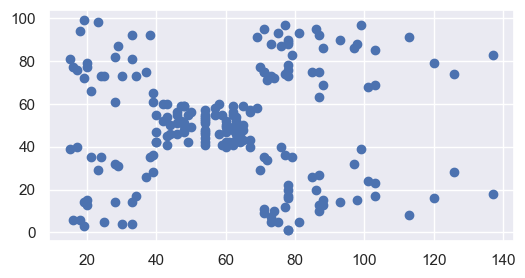

In [36]:
plt.figure(figsize=(6,3))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [25]:
## choosing correct numbers of clusters
## WCSS = Within clusters sum of squares

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=12)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

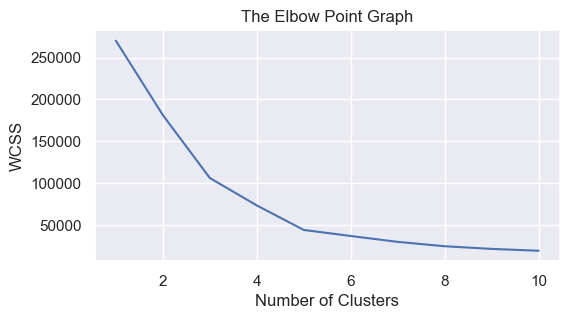

In [35]:
## plot an elbow graph
plt.figure(figsize=(6,3))
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

####  Optimum Number of Clusters = 5

In [11]:
# Training the k-means clustering model
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=12)

In [12]:
# RETURN A LABEL FOR EACH DATA POINTS BASED ON THRIE CLUSTERS
y = kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


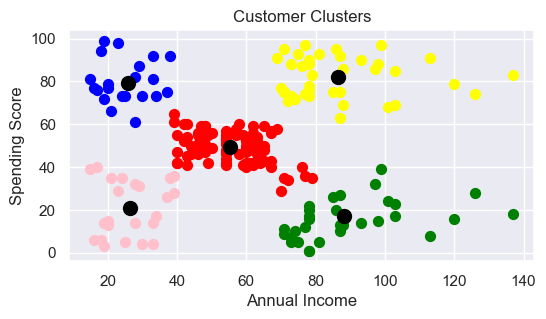

In [34]:
# 5 clusters = 1,2,3,4,5
plt.figure(figsize=(6,3))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='pink',label='Cluster 5')
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,color='black',label='Centroids')
plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

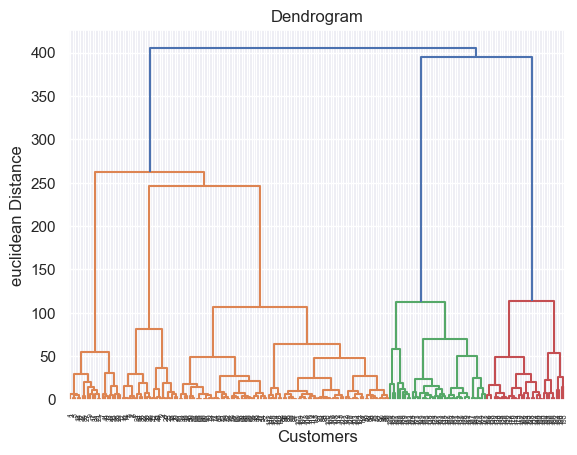

In [14]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("euclidean Distance")
plt.xticks(rotation=90)
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [17]:
y = hc.fit_predict(x)
print(y)

In [19]:
# Provide me the annual income and spending score of the peoples who are in cluster 0
x[y==0,0], x[y==0,1]

(array([ 71,  71,  73,  73,  74,  75,  77,  78,  78,  78,  78,  78,  78,
         81,  85,  86,  87,  87,  87,  88,  88,  93,  97,  98,  99, 101,
        103, 103, 113, 120, 126, 137], dtype=int64),
 array([11,  9,  5,  7, 10,  5, 12, 22, 17, 20, 16,  1,  1,  5, 26, 20, 27,
        13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28, 18],
       dtype=int64))

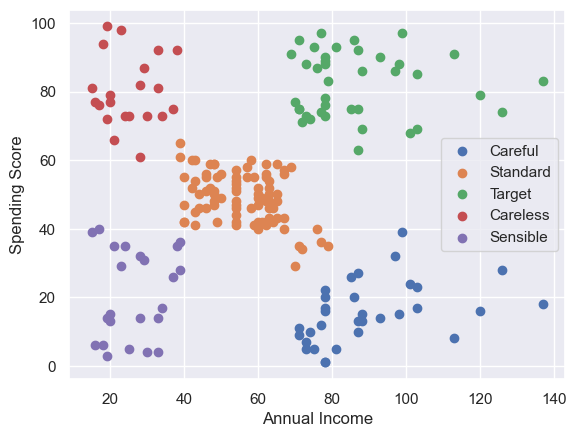

In [20]:
## Scatter plot the above context
plt.scatter(x[y==0,0], x[y==0,1],label='Careful')
plt.scatter(x[y==1,0], x[y==1,1],label='Standard')
plt.scatter(x[y==2,0], x[y==2,1],label='Target')
plt.scatter(x[y==3,0], x[y==3,1],label='Careless')
plt.scatter(x[y==4,0], x[y==4,1],label='Sensible')
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [21]:
df['Target'] = y

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
